# Facilitated Machine Learning Models for Karyotyping in the Patients with Chromosomal Abnormalities: Retrospective Study

- **Chuan Yang**, MD, PhD Student
- Mentor: **Yanyan Zhao**, MD, PhD
- Shengjing Hospital of China Medical University

# All Chromosomes

# Modules

In [1]:
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sb

from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.model_selection import KFold

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow import keras

from os import walk

import time
import datetime

import json

%matplotlib inline

In [2]:
iterationNumber = 0

# 1. Read the File to Acquire the Filename

In [3]:
with open('data_X_train_name.json') as json_file:
    X_train_name = json.load(json_file)
X_train_name

{'chr_01': {'0': ['D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_01\\w21000~A.0001.K.jpg.1L.bmp',
   'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_01\\w21001~A.0008.K.1L.bmp',
   'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_01\\w21001~A.0008.K.1R.bmp',
   'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_01\\w21002~A.0024.K.jpg.1L.bmp',
   'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_01\\w21002~A.0024.K.jpg.1R.bmp',
   'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_01\\w21008~A.0008.K.jpg.1L.bmp',
   'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_01\\w21008~A.0008.K.jpg.1R.bmp',
   'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_01\\W21011~A.0008.K.1L.bmp',
   'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_01\\W21011~A.0008.K.1R

In [4]:
with open('data_X_test_name.json') as json_file:
    X_test_name = json.load(json_file)
X_test_name['chr_01']['0']

['D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_01\\W21012~A.0019.K.1R.bmp',
 'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_01\\W21486~A.0020.K.jpg.1L.bmp',
 'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_01\\W21563~A.0006.K.jpg.bmp',
 'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_01\\W21587~A.0010.K.jpg.1L.bmp',
 'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_01\\W21587~A.0010.K.jpg.1R.bmp',
 'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_01\\W21890~A.0005.K.jpg.1R.bmp',
 'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_01\\W21902~A.0010.K.jpg.1R.bmp',
 'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_01\\W22451~A.0011.K.jpg.1R.bmp',
 'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_01\\W22455~A.0002.K.jpg.1L.bmp',
 'D:\\Users\\Chua

In [5]:
with open('data_theWhole.json') as json_file:
    theWhole = json.load(json_file)
theWhole

{'chr_01': ['D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_01\\w21000~A.0001.K.jpg.1L.bmp',
  'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_01\\w21001~A.0008.K.1L.bmp',
  'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_01\\w21001~A.0008.K.1R.bmp',
  'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_01\\w21002~A.0024.K.jpg.1L.bmp',
  'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_01\\w21002~A.0024.K.jpg.1R.bmp',
  'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_01\\w21008~A.0008.K.jpg.1L.bmp',
  'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_01\\w21008~A.0008.K.jpg.1R.bmp',
  'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_01\\W21011~A.0008.K.1L.bmp',
  'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_01\\W21011~A.0008.K.1R.bmp',
  'D:\\

# Iteration Starts Here:

# 3. Iteration

## 3.1 Image Input

### 3.1.x Display the Split Method

In [6]:
file_k_fold = open('KFold_Round_'+str(iterationNumber)+'.txt', 'w')

print('Iteration No. ', iterationNumber)
file_k_fold.write('Iteration No. %s\n\n' % iterationNumber)


for chrNo in theWhole.keys():
    print(chrNo)
    file_k_fold.write('%s\n' % chrNo)
    print('   Train: ')
    file_k_fold.write('Train: \n')
    for item in X_train_name[chrNo][str(iterationNumber)]:
        print('       ', item.split('\\')[-1])
        file_k_fold.write('      %s\n' % item.split('\\')[-1])
    print('   Test: ')
    file_k_fold.write('Test: \n')
    for item in X_test_name[chrNo][str(iterationNumber)]:
        print('       ', item.split('\\')[-1])
        file_k_fold.write('      %s\n' % item.split('\\')[-1])
    file_k_fold.write('\n')
        
file_k_fold.close()

Iteration No.  0
chr_01
   Train: 
        w21000~A.0001.K.jpg.1L.bmp
        w21001~A.0008.K.1L.bmp
        w21001~A.0008.K.1R.bmp
        w21002~A.0024.K.jpg.1L.bmp
        w21002~A.0024.K.jpg.1R.bmp
        w21008~A.0008.K.jpg.1L.bmp
        w21008~A.0008.K.jpg.1R.bmp
        W21011~A.0008.K.1L.bmp
        W21011~A.0008.K.1R.bmp
        W21012~A.0019.K.1L.bmp
        W21014~A.0005.K.1L.bmp
        W21014~A.0005.K.1R.bmp
        W21022~A.0007.K.jpg.1L.bmp
        W21022~A.0007.K.jpg.1R.bmp
        W21025~A.0002.K.jpg.1L.bmp
        W21025~A.0002.K.jpg.1R.bmp
        W21027~A.0003.K.1L.bmp
        W21027~A.0003.K.1R.bmp
        W21486~A.0020.K.jpg.1R.bmp
        W21486~A.0020.K.jpg.2L.bmp
        W21486~A.0020.K.jpg.2R.bmp
        W21559~A.0005.1L.bmp
        W21559~A.0005.1R.bmp
        W21563~A.0006.K.1R.bmp
        W21570~A.0001.K.jpg.1L.bmp
        W21570~A.0001.K.jpg.1R.bmp
        W21576~A.0010.K.jpg.1L.bmp
        W21576~A.0010.K.jpg.1R.bmp
        W21587~A.0008.K.jpg.1L.bmp
  

        W22455~A.0002.K.jpg.22L.bmp
        W22455~A.0002.K.jpg.22R.bmp
        W22666-1.0002.K.jpg.22R.bmp
        W22670~A.0006.K.jpg.22L.bmp
        W22670~A.0006.K.jpg.22R.bmp
        W22672~A.0004.K.jpg.22L.bmp
        W22672~A.0004.K.jpg.22R.bmp
        w22881~A.0017.K.jpg.22R.bmp
        W23070~A.0001.K.jpg.22L.bmp
        W23070~A.0001.K.jpg.22R.bmp
        W23075-1~A.0017.K.jpg.22L.bmp
        W23082.0026.K.jpg.22R.bmp
        W23084~A.0003.K.jp.22L.bmp
        W23084~A.0003.K.jp.22R.bmp
   Test: 
        W21576~A.0010.K.jpg.22L.bmp
        W21576~A.0010.K.jpg.22R.bmp
        W21587~A.0010.K.jpg.22R.bmp
        W21890~A.0005.K.jpg.22L.bmp
        w22292~A.0027.K.jpg.22L.bmp
        w22292~A.0027.K.jpg.22R.bmp
        W22666-1.0002.K.jpg.22L.bmp
        w22881~A.0017.K.jpg.22L.bmp
        W23075-1~A.0017.K.jpg.22R.bmp
        W23082.0026.K.jpg.22L.bmp
chr_x
   Train: 
        191128-del(X)(p22)-10L.bmp
        191128-del(X)(p22)-11L.bmp
        191128-del(X)(p22)-12L.bmp
      

### 3.1.1. Helper Functions

In [7]:
def extractData(image):
    x = image.size[0]
    y = image.size[1]
    
    matrix = []
    rgb_matrix = []

    for i in range(x):
        matrix.append([])
        rgb_matrix.append([])
        
        for j in range(y):
            r, g, b = image.getpixel((j, i))            
            value = r * 299.0/1000 + g * 587.0/1000 + b * 114.0/1000
            value = int(value)
            matrix[i].append(value)
            rgb_matrix[i].append((r,g,b))
    return matrix, rgb_matrix

In [8]:
def imageReconstruct(matrix):
    df = np.array(matrix, dtype=np.uint8)
    img = Image.fromarray(df, 'RGB')
    img.save('image.png')
    return img

### 3.1.2. Assignment of Training Data

#### 3.1.2.1 Training: Image Object Assignment

In [9]:
image = {}

# 定义容纳图片对象的dictionary类型的变量image

i = 0

for chrNo in theWhole.keys():
    image[chrNo] = []
    for case in X_train_name[chrNo][str(iterationNumber)]:
        
        # 上面一行第二个中括号内为split的序号，0为第0次split分法
        
        img = Image.open(case)
        image[chrNo].append(img)
        
        # image字典接受的是图片对象

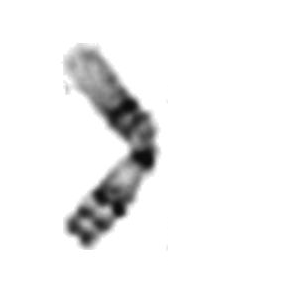

In [10]:
image['chr_01'][1] # 测试一下图像对象

#### 3.1.2.2. Training: Data Extraction from Images

#### - Training Set Data: 将图像对象转变为矩阵数值

In [11]:
data = {}
#rgb_data = {}

for chrNo in image.keys():
    data[chrNo] = []; 
    #rgb_data[chrNo] = []
    for case in image[chrNo]:
        grey, rgb = extractData(case)
        data[chrNo].append(grey)
        #rgb_data[chrNo].append(rgb)

In [12]:
array = {}

for chrNo in data.keys():
    array[chrNo] = []
    for case in data[chrNo]:            
        array[chrNo].append(case)

x_train_list = []
y_train_list = []

for y, x in array.items():    
    for x_item in x:
        x_train_list.append(x_item)
        y_train_list.append(y)
        
        # 将图像数据赋值给x_train_list;
        # 将标签数据赋值给y_train_list.

### 3.1.3. Assignment of Testing Data

#### 3.1.3.1. Testing: Image Object Assignment

In [13]:
# 方法同前面的Training Set

image = {}
i = 0

for chrNo in theWhole.keys():
    image[chrNo] = []
    for case in X_test_name[chrNo][str(iterationNumber)]: # Change here for different iterations!!!!!
        
        # 上面一行第二个中括号内为split的序号，0为第0次split分法
        
        img = Image.open(case)
        image[chrNo].append(img)

#### 3.1.3.2. Testing: Data Extraction from Images

In [14]:
data = {}
#rgb_data = {}

for chrNo in image.keys():
    data[chrNo] = []; 
    #rgb_data[chrNo] = []
    for case in image[chrNo]:
        grey, rgb = extractData(case)
        data[chrNo].append(grey)
        #rgb_data[chrNo].append(rgb)

In [15]:
array = {}

for chrNo in data.keys():
    array[chrNo] = []
    for case in data[chrNo]:            
        array[chrNo].append(case)

x_test_list = []
y_test_list = []

for y, x in array.items():    
    for x_item in x:
        x_test_list.append(x_item)
        y_test_list.append(y)

### 3.1.4. ChromConvert

In [16]:
chromConvert = {'chr_01': 1, 
               'chr_02': 2, 
               'chr_03': 3, 
               'chr_04': 4, 
               'chr_05': 5, 
               'chr_06': 6, 
               'chr_07': 7, 
               'chr_08': 8, 
               'chr_09': 9, 
               'chr_10': 10, 
               'chr_11': 11, 
               'chr_12': 12, 
               'chr_13': 13, 
               'chr_14': 14, 
               'chr_15': 15, 
               'chr_16': 16, 
               'chr_17': 17, 
               'chr_18': 18, 
               'chr_19': 19, 
               'chr_20': 20, 
               'chr_21': 21, 
               'chr_22': 22, 
               'chr_x': 0, 
               'chr_y': 23, 
                'chr_18_p11_deletion': 24,
                'chr_18_q10_isochromosome': 25,
                'chr_9_inversion': 26,
                'chr_5_p14_deletion': 27,
                'chr_x_isochromosome': 28,
                'chr_x_p22_cnv': 29, 
                'chr_x_q21_cnv': 30,
                'chr_x_q22_deletion': 31
               }

In [17]:
chromConvert_reverse = {1: 'chr_01',
                2: 'chr_02', 
                3: 'chr_03',
                4: 'chr_04',
                5: 'chr_05', 
                6: 'chr_06',
                7: 'chr_07',
                8: 'chr_08',
                9: 'chr_09',
                10: 'chr_10',
                11: 'chr_11',
                12: 'chr_12',
                13: 'chr_13',
                14: 'chr_14',
                15: 'chr_15',
                16: 'chr_16',
                17: 'chr_17',
                18: 'chr_18',
                19: 'chr_19',
                20: 'chr_20', 
                21: 'chr_21', 
                22: 'chr_22', 
                0: 'chr_x', 
                23: 'chr_y', 
                24:  'chr_18_p11_deletion',
                25: 'chr_18_q10_isochromosome',
                26: 'chr_9_inversion',
                27: 'chr_5_p14_deletion',
                28: 'chr_x_isochromosome',
                29: 'chr_x_p22_cnv', 
                30: 'chr_x_q21_cnv',
                31: 'chr_x_q22_deletion'
               }

In [18]:
# 将染色体序号和异常核型名称更换为序号，序号定义在程序开始部分

y_train_digital_list = []
for item in y_train_list:
    y_train_digital_list.append(chromConvert[item])
    
y_test_digital_list = []
for item in y_test_list:
    y_test_digital_list.append(chromConvert[item])

### 3.1.5. Change to Numpy Array

In [19]:
X_train = np.array(x_train_list)
y_train = np.array(y_train_digital_list)

In [20]:
X_test = np.array(x_test_list)
y_test = np.array(y_test_digital_list)

In [21]:
y_test

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,
        5,  5,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  7,  7,  7,  7,  7,
        7,  7,  7,  7,  7,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  9,
        9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,
        9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,
        9,  9,  9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11,
       11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13,
       13, 13, 13, 13, 13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14,
       14, 14, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16,
       16, 16, 16, 16, 16, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18,
       18, 18, 18, 18, 18

In [22]:
len(X_train)

2536

In [23]:
X_train[0].shape

(300, 300)

## 3.2. Convolutional Neural Network

### 3.2.1 Data Preparation

In [24]:
X_train = X_train.reshape(-1, 300, 300, 1)
X_test = X_test.reshape(-1, 300, 300, 1)

### 3.2.3 Training Model Design

In [25]:
model = Sequential()

In [26]:
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(300, 300, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

In [27]:
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dense(1024, activation='relu'))
model.add(Dense(32, activation='softmax'))

### 3.2.4. Tensorboard Initilization

In [28]:
%load_ext tensorboard
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

### 3.2.5. Compile the modal

In [29]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

### 3.2.6. Fitting (拟合)

In [30]:
model.fit(X_train, y_train, epochs=1000, batch_size=64, verbose=1, 
          validation_data=(X_test, y_test),
          callbacks=[tensorboard_callback])

Epoch 1/1000
40/40 [==============================] - 10s 163ms/step - loss: 5.0073 - accuracy: 0.2011 - val_loss: 1.9972 - val_accuracy: 0.3935
Epoch 2/1000
40/40 [==============================] - 4s 112ms/step - loss: 1.2841 - accuracy: 0.6069 - val_loss: 0.9608 - val_accuracy: 0.6944
Epoch 3/1000
40/40 [==============================] - 5s 113ms/step - loss: 0.7216 - accuracy: 0.7693 - val_loss: 0.8377 - val_accuracy: 0.7523
Epoch 4/1000
40/40 [==============================] - 4s 104ms/step - loss: 0.5282 - accuracy: 0.8233 - val_loss: 0.6245 - val_accuracy: 0.8125
Epoch 5/1000
40/40 [==============================] - 4s 106ms/step - loss: 0.3324 - accuracy: 0.8916 - val_loss: 0.6527 - val_accuracy: 0.8194
Epoch 6/1000
40/40 [==============================] - 4s 104ms/step - loss: 0.2593 - accuracy: 0.9140 - val_loss: 0.6838 - val_accuracy: 0.8403
Epoch 7/1000
40/40 [==============================] - 4s 105ms/step - loss: 0.1770 - accuracy: 0.9401 - val_loss: 0.5957 - val_accuracy

40/40 [==============================] - 4s 103ms/step - loss: 0.0037 - accuracy: 0.9980 - val_loss: 0.9171 - val_accuracy: 0.8796
Epoch 58/1000
40/40 [==============================] - 4s 103ms/step - loss: 0.0041 - accuracy: 0.9972 - val_loss: 0.8918 - val_accuracy: 0.8704
Epoch 59/1000
40/40 [==============================] - 4s 104ms/step - loss: 14.0841 - accuracy: 0.3143 - val_loss: 3.4169 - val_accuracy: 0.0394
Epoch 60/1000
40/40 [==============================] - 4s 104ms/step - loss: 3.3431 - accuracy: 0.0726 - val_loss: 3.3109 - val_accuracy: 0.0903
Epoch 61/1000
40/40 [==============================] - 4s 104ms/step - loss: 3.3078 - accuracy: 0.0903 - val_loss: 3.3069 - val_accuracy: 0.0903
Epoch 62/1000
40/40 [==============================] - 4s 103ms/step - loss: 3.3049 - accuracy: 0.0919 - val_loss: 3.3030 - val_accuracy: 0.0880
Epoch 63/1000
40/40 [==============================] - 4s 104ms/step - loss: 3.3030 - accuracy: 0.0887 - val_loss: 3.3039 - val_accuracy: 0.090

40/40 [==============================] - 4s 105ms/step - loss: 3.2998 - accuracy: 0.0903 - val_loss: 3.3012 - val_accuracy: 0.0903
Epoch 114/1000
40/40 [==============================] - 4s 104ms/step - loss: 3.2993 - accuracy: 0.0852 - val_loss: 3.3010 - val_accuracy: 0.0903
Epoch 115/1000
40/40 [==============================] - 4s 108ms/step - loss: 3.2995 - accuracy: 0.0864 - val_loss: 3.3009 - val_accuracy: 0.0903
Epoch 116/1000
40/40 [==============================] - 4s 103ms/step - loss: 3.2999 - accuracy: 0.0903 - val_loss: 3.3011 - val_accuracy: 0.0903
Epoch 117/1000
40/40 [==============================] - 4s 104ms/step - loss: 3.3006 - accuracy: 0.0903 - val_loss: 3.3011 - val_accuracy: 0.0903
Epoch 118/1000
40/40 [==============================] - 4s 104ms/step - loss: 3.2997 - accuracy: 0.0903 - val_loss: 3.3010 - val_accuracy: 0.0903
Epoch 119/1000
40/40 [==============================] - 4s 104ms/step - loss: 3.2995 - accuracy: 0.0868 - val_loss: 3.3010 - val_accuracy: 

40/40 [==============================] - 4s 104ms/step - loss: 3.2994 - accuracy: 0.0903 - val_loss: 3.3009 - val_accuracy: 0.0903
Epoch 170/1000
40/40 [==============================] - 4s 104ms/step - loss: 3.2986 - accuracy: 0.0903 - val_loss: 3.3011 - val_accuracy: 0.0903
Epoch 171/1000
40/40 [==============================] - 4s 104ms/step - loss: 3.2991 - accuracy: 0.0832 - val_loss: 3.3010 - val_accuracy: 0.0903
Epoch 172/1000
40/40 [==============================] - 4s 104ms/step - loss: 3.2991 - accuracy: 0.0903 - val_loss: 3.3009 - val_accuracy: 0.0903
Epoch 173/1000
40/40 [==============================] - 4s 104ms/step - loss: 3.2992 - accuracy: 0.0903 - val_loss: 3.3008 - val_accuracy: 0.0903
Epoch 174/1000
40/40 [==============================] - 4s 103ms/step - loss: 3.2988 - accuracy: 0.0903 - val_loss: 3.3009 - val_accuracy: 0.0903
Epoch 175/1000
40/40 [==============================] - 4s 103ms/step - loss: 3.2988 - accuracy: 0.0903 - val_loss: 3.3009 - val_accuracy: 

40/40 [==============================] - 4s 104ms/step - loss: 3.2987 - accuracy: 0.0903 - val_loss: 3.3010 - val_accuracy: 0.0903
Epoch 226/1000
40/40 [==============================] - 4s 104ms/step - loss: 3.2989 - accuracy: 0.0903 - val_loss: 3.3009 - val_accuracy: 0.0903
Epoch 227/1000
40/40 [==============================] - 4s 104ms/step - loss: 3.2990 - accuracy: 0.0903 - val_loss: 3.3009 - val_accuracy: 0.0903
Epoch 228/1000
40/40 [==============================] - 4s 103ms/step - loss: 3.2990 - accuracy: 0.0820 - val_loss: 3.3009 - val_accuracy: 0.0903
Epoch 229/1000
40/40 [==============================] - 4s 103ms/step - loss: 3.2986 - accuracy: 0.0840 - val_loss: 3.3011 - val_accuracy: 0.0903
Epoch 230/1000
40/40 [==============================] - 4s 108ms/step - loss: 3.2989 - accuracy: 0.0903 - val_loss: 3.3009 - val_accuracy: 0.0903
Epoch 231/1000
40/40 [==============================] - 4s 103ms/step - loss: 3.2986 - accuracy: 0.0903 - val_loss: 3.3009 - val_accuracy: 

40/40 [==============================] - 4s 104ms/step - loss: 3.2984 - accuracy: 0.0903 - val_loss: 3.3010 - val_accuracy: 0.0903
Epoch 282/1000
40/40 [==============================] - 4s 106ms/step - loss: 3.2984 - accuracy: 0.0903 - val_loss: 3.3009 - val_accuracy: 0.0903
Epoch 283/1000
40/40 [==============================] - 5s 116ms/step - loss: 3.2989 - accuracy: 0.0903 - val_loss: 3.3009 - val_accuracy: 0.0903
Epoch 284/1000
40/40 [==============================] - 5s 117ms/step - loss: 3.2983 - accuracy: 0.0903 - val_loss: 3.3008 - val_accuracy: 0.0903
Epoch 285/1000
40/40 [==============================] - 5s 113ms/step - loss: 3.2982 - accuracy: 0.0903 - val_loss: 3.3009 - val_accuracy: 0.0903
Epoch 286/1000
40/40 [==============================] - 5s 113ms/step - loss: 3.2984 - accuracy: 0.0903 - val_loss: 3.3009 - val_accuracy: 0.0903
Epoch 287/1000
40/40 [==============================] - 4s 113ms/step - loss: 3.2983 - accuracy: 0.0820 - val_loss: 3.3009 - val_accuracy: 

40/40 [==============================] - 4s 102ms/step - loss: 3.2979 - accuracy: 0.0903 - val_loss: 3.3009 - val_accuracy: 0.0903
Epoch 338/1000
40/40 [==============================] - 4s 102ms/step - loss: 3.2983 - accuracy: 0.0903 - val_loss: 3.3009 - val_accuracy: 0.0903
Epoch 339/1000
40/40 [==============================] - 4s 101ms/step - loss: 3.2982 - accuracy: 0.0903 - val_loss: 3.3008 - val_accuracy: 0.0903
Epoch 340/1000
40/40 [==============================] - 4s 102ms/step - loss: 3.2979 - accuracy: 0.0903 - val_loss: 3.3008 - val_accuracy: 0.0903
Epoch 341/1000
40/40 [==============================] - 4s 102ms/step - loss: 3.2984 - accuracy: 0.0812 - val_loss: 3.3009 - val_accuracy: 0.0903
Epoch 342/1000
40/40 [==============================] - 4s 102ms/step - loss: 3.2981 - accuracy: 0.0903 - val_loss: 3.3009 - val_accuracy: 0.0903
Epoch 343/1000
40/40 [==============================] - 4s 102ms/step - loss: 3.2979 - accuracy: 0.0903 - val_loss: 3.3009 - val_accuracy: 

40/40 [==============================] - 4s 110ms/step - loss: 3.2978 - accuracy: 0.0903 - val_loss: 3.3009 - val_accuracy: 0.0903
Epoch 394/1000
40/40 [==============================] - 4s 111ms/step - loss: 3.2983 - accuracy: 0.0824 - val_loss: 3.3009 - val_accuracy: 0.0903
Epoch 395/1000
40/40 [==============================] - 4s 108ms/step - loss: 3.2980 - accuracy: 0.0903 - val_loss: 3.3009 - val_accuracy: 0.0903
Epoch 396/1000
40/40 [==============================] - 4s 101ms/step - loss: 3.2976 - accuracy: 0.0903 - val_loss: 3.3009 - val_accuracy: 0.0903
Epoch 397/1000
40/40 [==============================] - 4s 103ms/step - loss: 3.2981 - accuracy: 0.0903 - val_loss: 3.3008 - val_accuracy: 0.0903
Epoch 398/1000
40/40 [==============================] - 4s 103ms/step - loss: 3.2979 - accuracy: 0.0903 - val_loss: 3.3009 - val_accuracy: 0.0903
Epoch 399/1000
40/40 [==============================] - 4s 103ms/step - loss: 3.2981 - accuracy: 0.0903 - val_loss: 3.3008 - val_accuracy: 

40/40 [==============================] - 4s 104ms/step - loss: 3.2976 - accuracy: 0.0903 - val_loss: 3.3008 - val_accuracy: 0.0903
Epoch 450/1000
40/40 [==============================] - 4s 104ms/step - loss: 3.2976 - accuracy: 0.0903 - val_loss: 3.3008 - val_accuracy: 0.0903
Epoch 451/1000
40/40 [==============================] - 4s 103ms/step - loss: 3.2978 - accuracy: 0.0903 - val_loss: 3.3008 - val_accuracy: 0.0903
Epoch 452/1000
40/40 [==============================] - 5s 115ms/step - loss: 3.2977 - accuracy: 0.0903 - val_loss: 3.3008 - val_accuracy: 0.0903
Epoch 453/1000
40/40 [==============================] - 4s 103ms/step - loss: 3.2979 - accuracy: 0.0903 - val_loss: 3.3009 - val_accuracy: 0.0903
Epoch 454/1000
40/40 [==============================] - 4s 102ms/step - loss: 3.2977 - accuracy: 0.0828 - val_loss: 3.3009 - val_accuracy: 0.0903
Epoch 455/1000
40/40 [==============================] - 4s 102ms/step - loss: 3.2978 - accuracy: 0.0903 - val_loss: 3.3009 - val_accuracy: 

40/40 [==============================] - 4s 111ms/step - loss: 3.2977 - accuracy: 0.0903 - val_loss: 3.3008 - val_accuracy: 0.0903
Epoch 506/1000
40/40 [==============================] - 4s 107ms/step - loss: 3.2978 - accuracy: 0.0903 - val_loss: 3.3008 - val_accuracy: 0.0903
Epoch 507/1000
40/40 [==============================] - 4s 103ms/step - loss: 3.2978 - accuracy: 0.0903 - val_loss: 3.3009 - val_accuracy: 0.0903
Epoch 508/1000
40/40 [==============================] - 4s 105ms/step - loss: 3.2976 - accuracy: 0.0903 - val_loss: 3.3008 - val_accuracy: 0.0903
Epoch 509/1000
40/40 [==============================] - 4s 110ms/step - loss: 3.2978 - accuracy: 0.0903 - val_loss: 3.3009 - val_accuracy: 0.0903
Epoch 510/1000
40/40 [==============================] - 4s 107ms/step - loss: 3.2978 - accuracy: 0.0903 - val_loss: 3.3008 - val_accuracy: 0.0903
Epoch 511/1000
40/40 [==============================] - 4s 110ms/step - loss: 3.2976 - accuracy: 0.0903 - val_loss: 3.3009 - val_accuracy: 

40/40 [==============================] - 5s 125ms/step - loss: 3.2977 - accuracy: 0.0903 - val_loss: 3.3009 - val_accuracy: 0.0903
Epoch 562/1000
40/40 [==============================] - 4s 103ms/step - loss: 3.2976 - accuracy: 0.0903 - val_loss: 3.3009 - val_accuracy: 0.0903
Epoch 563/1000
40/40 [==============================] - 4s 103ms/step - loss: 3.2977 - accuracy: 0.0903 - val_loss: 3.3009 - val_accuracy: 0.0903
Epoch 564/1000
40/40 [==============================] - 4s 103ms/step - loss: 3.2973 - accuracy: 0.0903 - val_loss: 3.3009 - val_accuracy: 0.0903
Epoch 565/1000
40/40 [==============================] - 4s 103ms/step - loss: 3.2977 - accuracy: 0.0903 - val_loss: 3.3010 - val_accuracy: 0.0903
Epoch 566/1000
40/40 [==============================] - 4s 103ms/step - loss: 3.2974 - accuracy: 0.0903 - val_loss: 3.3009 - val_accuracy: 0.0903
Epoch 567/1000
40/40 [==============================] - 4s 108ms/step - loss: 3.2979 - accuracy: 0.0903 - val_loss: 3.3009 - val_accuracy: 

40/40 [==============================] - 5s 119ms/step - loss: 3.2976 - accuracy: 0.0903 - val_loss: 3.3009 - val_accuracy: 0.0903
Epoch 618/1000
40/40 [==============================] - 5s 123ms/step - loss: 3.2975 - accuracy: 0.0903 - val_loss: 3.3009 - val_accuracy: 0.0903
Epoch 619/1000
40/40 [==============================] - 4s 103ms/step - loss: 3.2978 - accuracy: 0.0903 - val_loss: 3.3010 - val_accuracy: 0.0903
Epoch 620/1000
40/40 [==============================] - 4s 103ms/step - loss: 3.2976 - accuracy: 0.0903 - val_loss: 3.3009 - val_accuracy: 0.0903
Epoch 621/1000
40/40 [==============================] - 4s 103ms/step - loss: 3.2975 - accuracy: 0.0903 - val_loss: 3.3008 - val_accuracy: 0.0903
Epoch 622/1000
40/40 [==============================] - 4s 103ms/step - loss: 3.2976 - accuracy: 0.0903 - val_loss: 3.3008 - val_accuracy: 0.0903
Epoch 623/1000
40/40 [==============================] - 4s 108ms/step - loss: 3.2975 - accuracy: 0.0903 - val_loss: 3.3008 - val_accuracy: 

40/40 [==============================] - 4s 103ms/step - loss: 3.2975 - accuracy: 0.0903 - val_loss: 3.3009 - val_accuracy: 0.0903
Epoch 674/1000
40/40 [==============================] - 4s 103ms/step - loss: 3.2975 - accuracy: 0.0903 - val_loss: 3.3008 - val_accuracy: 0.0903
Epoch 675/1000
40/40 [==============================] - 4s 102ms/step - loss: 3.2976 - accuracy: 0.0903 - val_loss: 3.3009 - val_accuracy: 0.0903
Epoch 676/1000
40/40 [==============================] - 4s 111ms/step - loss: 3.2973 - accuracy: 0.0903 - val_loss: 3.3008 - val_accuracy: 0.0903
Epoch 677/1000
40/40 [==============================] - 5s 122ms/step - loss: 3.2976 - accuracy: 0.0903 - val_loss: 3.3008 - val_accuracy: 0.0903
Epoch 678/1000
40/40 [==============================] - 5s 116ms/step - loss: 3.2973 - accuracy: 0.0903 - val_loss: 3.3008 - val_accuracy: 0.0903
Epoch 679/1000
40/40 [==============================] - 4s 103ms/step - loss: 3.2974 - accuracy: 0.0903 - val_loss: 3.3008 - val_accuracy: 

40/40 [==============================] - 4s 102ms/step - loss: 3.2974 - accuracy: 0.0903 - val_loss: 3.3008 - val_accuracy: 0.0903
Epoch 730/1000
40/40 [==============================] - 4s 108ms/step - loss: 3.2974 - accuracy: 0.0903 - val_loss: 3.3008 - val_accuracy: 0.0903
Epoch 731/1000
40/40 [==============================] - 4s 103ms/step - loss: 3.2974 - accuracy: 0.0903 - val_loss: 3.3008 - val_accuracy: 0.0903
Epoch 732/1000
40/40 [==============================] - 4s 103ms/step - loss: 3.2974 - accuracy: 0.0903 - val_loss: 3.3008 - val_accuracy: 0.0903
Epoch 733/1000
40/40 [==============================] - 4s 102ms/step - loss: 3.2974 - accuracy: 0.0903 - val_loss: 3.3008 - val_accuracy: 0.0903
Epoch 734/1000
40/40 [==============================] - 4s 102ms/step - loss: 3.2974 - accuracy: 0.0903 - val_loss: 3.3009 - val_accuracy: 0.0903
Epoch 735/1000
40/40 [==============================] - 4s 102ms/step - loss: 3.2974 - accuracy: 0.0903 - val_loss: 3.3009 - val_accuracy: 

KeyboardInterrupt: 

### 3.2.7 Summary

In [ ]:
model.summary()

### 3.2.8. Tensorboard Display

In [ ]:
%tensorboard --logdir logs/fit

## 3.8 Save the Model

In [ ]:
model.save('saved_model/model_allClass_cnn_iteration_'+str(iterationNumber))

## 3.9 Load the Model

In [ ]:
model_reload = keras.models.load_model('saved_model/model_allClass_cnn_iteration_'+str(iterationNumber))

## 3.10. Performance Measures

### 3.10.1. Accuracy

In [ ]:
loss, acc = model_reload.evaluate(X_test, y_test, verbose=0)
print('Test Accuracy: %.3f' % acc)

In [ ]:
len(X_test)

In [ ]:
y_predict = model_reload.predict(X_test)

In [ ]:
len(y_predict)

In [ ]:
# The number 32 means the type number of all chromosome class number inlcuding abnormal ones
y_predict_filtered = []

for sample in y_predict:
    maximum = 0
    indicator = 0
    for i in range(32):
        if sample[i] > maximum:
            maximum = sample[i]
            indicator = i
    y_predict_filtered.append(indicator)        

In [ ]:
label = ['chr_01', 'chr_02', 'chr_03',  'chr_04', 'chr_05', 'chr_06', 'chr_07',  'chr_08',  'chr_09', 'chr_10',
'chr_11', 'chr_12', 'chr_13', 'chr_14', 'chr_15',  'chr_16', 'chr_17', 'chr_18', 'chr_19',  'chr_20',  
'chr_21', 'chr_22', 'chr_x', 'chr_y',  'chr_18_p11_deletion', 'chr_18_q10_isochromosome', 
'chr_9_inversion', 'chr_5_p14_deletion', 
'chr_x_isochromosome', 'chr_x_p22_cnv', 'chr_x_q21_cnv',  'chr_x_q22_deletion']

label_convert = []

for i in range(32):
    label_convert.append(chromConvert_reverse[i])

### 3.10.2. Classification Report

In [ ]:
performanceReport = classification_report(y_test, y_predict_filtered, target_names=label_convert)

# Change here for different iteration!!!!!

print(performanceReport)

### 3.10.3. Confusion Matrix

In [ ]:
cm = np.array(confusion_matrix(y_test, y_predict_filtered, labels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9 ,
                                                                   10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 
                                                                  20, 21, 22, 23, 24, 25, 26, 27, 28, 29,
                                                                  30, 31]))
confusion = pd.DataFrame(cm, index=label_convert,
                        columns=label_convert)
confusion.to_csv('ConfusionMatrix_KaryoType_CNN' + str(iterationNumber) + '.csv')
confusion

### 3.10.4 Rate of Confusion Matrix

In [ ]:
subtotal = [0] * 32  
for item in y_test:
    subtotal[item] = subtotal[item] + 1

In [ ]:
cm_r = []
for i in range(32):
    cm_r.append(cm[i]/subtotal[i])

In [ ]:
cm_array = np.array(cm_r)

In [ ]:
confusion_r = pd.DataFrame(cm_r, index=label_convert,
                        columns=label_convert)
confusion.to_csv('ConfusionMatrix_Rate_KaryoType_CNN' + str(iterationNumber) + '.csv')
confusion_r

#### Heat Map: Number

In [ ]:
plt.figure(figsize=(30, 24))
heat_map = sb.heatmap(confusion, annot=True,  # It's a Seaborn function
                      cmap='coolwarm', 
                      xticklabels=confusion.columns, yticklabels=confusion.index, 
                      linewidths=.5, 
                      annot_kws={"size": 20})
sb.set(font_scale = 2)

#### Heat Map: Rate (important!!!)

In [ ]:
plt.figure(figsize=(30, 24))
heat_map_r = sb.heatmap(confusion_r, annot=True,  # It's a Seaborn function
                      cmap='coolwarm', 
                      xticklabels=confusion.columns, yticklabels=confusion.index, 
                      linewidths=.5, 
                      annot_kws={"size": 20})
sb.set(font_scale = 2)

In [ ]:
fig = heat_map.get_figure()    
fig.savefig('Heatmap_Iteration_' + str(iterationNumber) + '.png', dpi=400)

In [ ]:
fig_r = heat_map_r.get_figure()    
fig_r.savefig('Heatmap_Rate_Iteration_' + str(iterationNumber) + '.png', dpi=400)

# Results

In [ ]:
print('Test Accuracy: %.3f' % acc)

In [ ]:
print(performanceReport)

In [ ]:
type(performanceReport)

In [ ]:
confusion

## Export to a text file

In [ ]:
file_report = open('Results_'+str(iterationNumber)+'.txt', 'w')
file_report.write('Accuracy: %s\n\n' % acc)
file_report.write('Performance Report: \n%s\n\n' % performanceReport)
file_report.write('Confusion Matrix: \n%s.\n\n' % confusion)
file_report.close()